In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.impute import SimpleImputer

# --- Step 1: Load and Preprocess Data ---
df = pd.read_csv("Weather_Data.csv")
df

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,"10.9085,76.9098",8/4/2015,32.0,23.0,26.6,35.1,23.0,27.7,21.3,74.7,...,20.5,8,NaN,2015-08-04T06:11:07,2015-08-04T18:45:46,0.63,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"VOCB,43321099999,remote,43317099999"
1,"10.9085,76.9098",8/5/2015,33.0,23.0,26.7,37.0,23.0,27.8,21.4,74.7,...,17.7,9,NaN,2015-08-05T06:11:15,2015-08-05T18:45:26,0.67,Partially cloudy,Becoming cloudy in the afternoon.,partly-cloudy-day,"VOCB,43321099999,remote,43317099999"
2,"10.9085,76.9098",8/6/2015,34.0,23.0,27.2,35.6,23.0,28.0,20.7,70.3,...,21.6,8,NaN,2015-08-06T06:11:23,2015-08-06T18:45:06,0.71,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"VOCB,43321099999,remote,43317099999"
3,"10.9085,76.9098",8/7/2015,33.0,23.9,26.7,36.1,23.9,27.6,21.5,74.8,...,18.9,8,NaN,2015-08-07T06:11:30,2015-08-07T18:44:45,0.75,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"VOCB,43321099999,remote,43317099999"
4,"10.9085,76.9098",8/8/2015,33.1,23.0,26.9,35.4,23.0,27.8,21.2,73.3,...,21.7,8,NaN,2015-08-08T06:11:37,2015-08-08T18:44:23,0.78,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"VOCB,43321099999,remote,43317099999"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3648,"10.9085,76.9098",7/30/2025,34.0,23.4,27.7,37.0,23.4,29.2,21.3,70.2,...,24.9,9,10.0,2025-07-30T06:10:31,2025-07-30T18:47:09,0.18,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"VOCB,43318099999,43321099999,43341099999,43335..."
3649,"10.9085,76.9098",7/31/2025,33.0,24.3,28.2,38.0,24.3,30.6,22.8,74.0,...,22.3,9,10.0,2025-07-31T06:10:41,2025-07-31T18:46:53,0.21,"Rain, Partially cloudy",Partly cloudy throughout the day with rain.,rain,"VOCB,43321099999,remote"
3650,"10.9085,76.9098",8/1/2025,33.0,25.0,27.7,38.0,25.0,29.8,23.0,76.4,...,18.0,8,30.0,2025-08-01T06:10:51,2025-08-01T18:46:36,0.25,"Rain, Partially cloudy",Partly cloudy throughout the day with a chance...,rain,"VOCB,remote"
3651,"10.9085,76.9098",8/2/2025,32.0,24.0,27.0,39.1,24.0,28.8,22.8,78.4,...,21.8,9,60.0,2025-08-02T06:11:00,2025-08-02T18:46:18,0.27,"Rain, Partially cloudy",Partly cloudy throughout the day with a chance...,rain,VOCB


In [2]:
# Step 2:  Data Preprocessing
# a) Separate Features (X) and Target (y)
y_raw = df['conditions']
X_raw = df.drop('conditions', axis=1)
X_raw

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarradiation,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,description,icon,stations
0,"10.9085,76.9098",8/4/2015,32.0,23.0,26.6,35.1,23.0,27.7,21.3,74.7,...,235.3,20.5,8,NaN,2015-08-04T06:11:07,2015-08-04T18:45:46,0.63,Partly cloudy throughout the day.,partly-cloudy-day,"VOCB,43321099999,remote,43317099999"
1,"10.9085,76.9098",8/5/2015,33.0,23.0,26.7,37.0,23.0,27.8,21.4,74.7,...,205.7,17.7,9,NaN,2015-08-05T06:11:15,2015-08-05T18:45:26,0.67,Becoming cloudy in the afternoon.,partly-cloudy-day,"VOCB,43321099999,remote,43317099999"
2,"10.9085,76.9098",8/6/2015,34.0,23.0,27.2,35.6,23.0,28.0,20.7,70.3,...,249.5,21.6,8,NaN,2015-08-06T06:11:23,2015-08-06T18:45:06,0.71,Partly cloudy throughout the day.,partly-cloudy-day,"VOCB,43321099999,remote,43317099999"
3,"10.9085,76.9098",8/7/2015,33.0,23.9,26.7,36.1,23.9,27.6,21.5,74.8,...,218.2,18.9,8,NaN,2015-08-07T06:11:30,2015-08-07T18:44:45,0.75,Partly cloudy throughout the day.,partly-cloudy-day,"VOCB,43321099999,remote,43317099999"
4,"10.9085,76.9098",8/8/2015,33.1,23.0,26.9,35.4,23.0,27.8,21.2,73.3,...,251.1,21.7,8,NaN,2015-08-08T06:11:37,2015-08-08T18:44:23,0.78,Partly cloudy throughout the day.,partly-cloudy-day,"VOCB,43321099999,remote,43317099999"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3648,"10.9085,76.9098",7/30/2025,34.0,23.4,27.7,37.0,23.4,29.2,21.3,70.2,...,286.6,24.9,9,10.0,2025-07-30T06:10:31,2025-07-30T18:47:09,0.18,Partly cloudy throughout the day.,partly-cloudy-day,"VOCB,43318099999,43321099999,43341099999,43335..."
3649,"10.9085,76.9098",7/31/2025,33.0,24.3,28.2,38.0,24.3,30.6,22.8,74.0,...,258.0,22.3,9,10.0,2025-07-31T06:10:41,2025-07-31T18:46:53,0.21,Partly cloudy throughout the day with rain.,rain,"VOCB,43321099999,remote"
3650,"10.9085,76.9098",8/1/2025,33.0,25.0,27.7,38.0,25.0,29.8,23.0,76.4,...,207.5,18.0,8,30.0,2025-08-01T06:10:51,2025-08-01T18:46:36,0.25,Partly cloudy throughout the day with a chance...,rain,"VOCB,remote"
3651,"10.9085,76.9098",8/2/2025,32.0,24.0,27.0,39.1,24.0,28.8,22.8,78.4,...,251.8,21.8,9,60.0,2025-08-02T06:11:00,2025-08-02T18:46:18,0.27,Partly cloudy throughout the day with a chance...,rain,VOCB


In [3]:

# b) Select only 'temp' and 'humidity'
feature_names = ['temp', 'humidity']
X = X_raw[feature_names]
X

,temp,humidity
0,26.6,74.7
1,26.7,74.7
2,27.2,70.3
3,26.7,74.8
4,26.9,73.3
...,...,...
3648,27.7,70.2
3649,28.2,74.0
3650,27.7,76.4
3651,27.0,78.4


In [4]:

# c) Handle Missing Values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)
X = pd.DataFrame(X_imputed, columns=X.columns)

# --- Manual Encoding ---
print("\n--- Encoding Target Variable ---")
encoding_map = {
    "Clear": 0,
    "Rain, Overcast": 1,
    "Rain, Partially cloudy": 2,
    "Partially cloudy": 3,
    "Overcast": 4
}
y = y_raw.map(encoding_map).values
print(y)

# Class names list in order of encoding
class_names = [key for key, _ in sorted(encoding_map.items(), key=lambda x: x[1])]
print(f"\nClass Mapping: {encoding_map}")




--- Encoding Target Variable ---
[3 3 3 ... 2 2 2]

Class Mapping: {'Clear': 0, 'Rain, Overcast': 1, 'Rain, Partially cloudy': 2, 'Partially cloudy': 3, 'Overcast': 4}



--- Training Decision Tree Classifier (max_depth=5) ---
Model training complete.

--- Generating Decision Tree Visualization... ---
Decision tree visualization saved as 'decision_tree_weather.png'


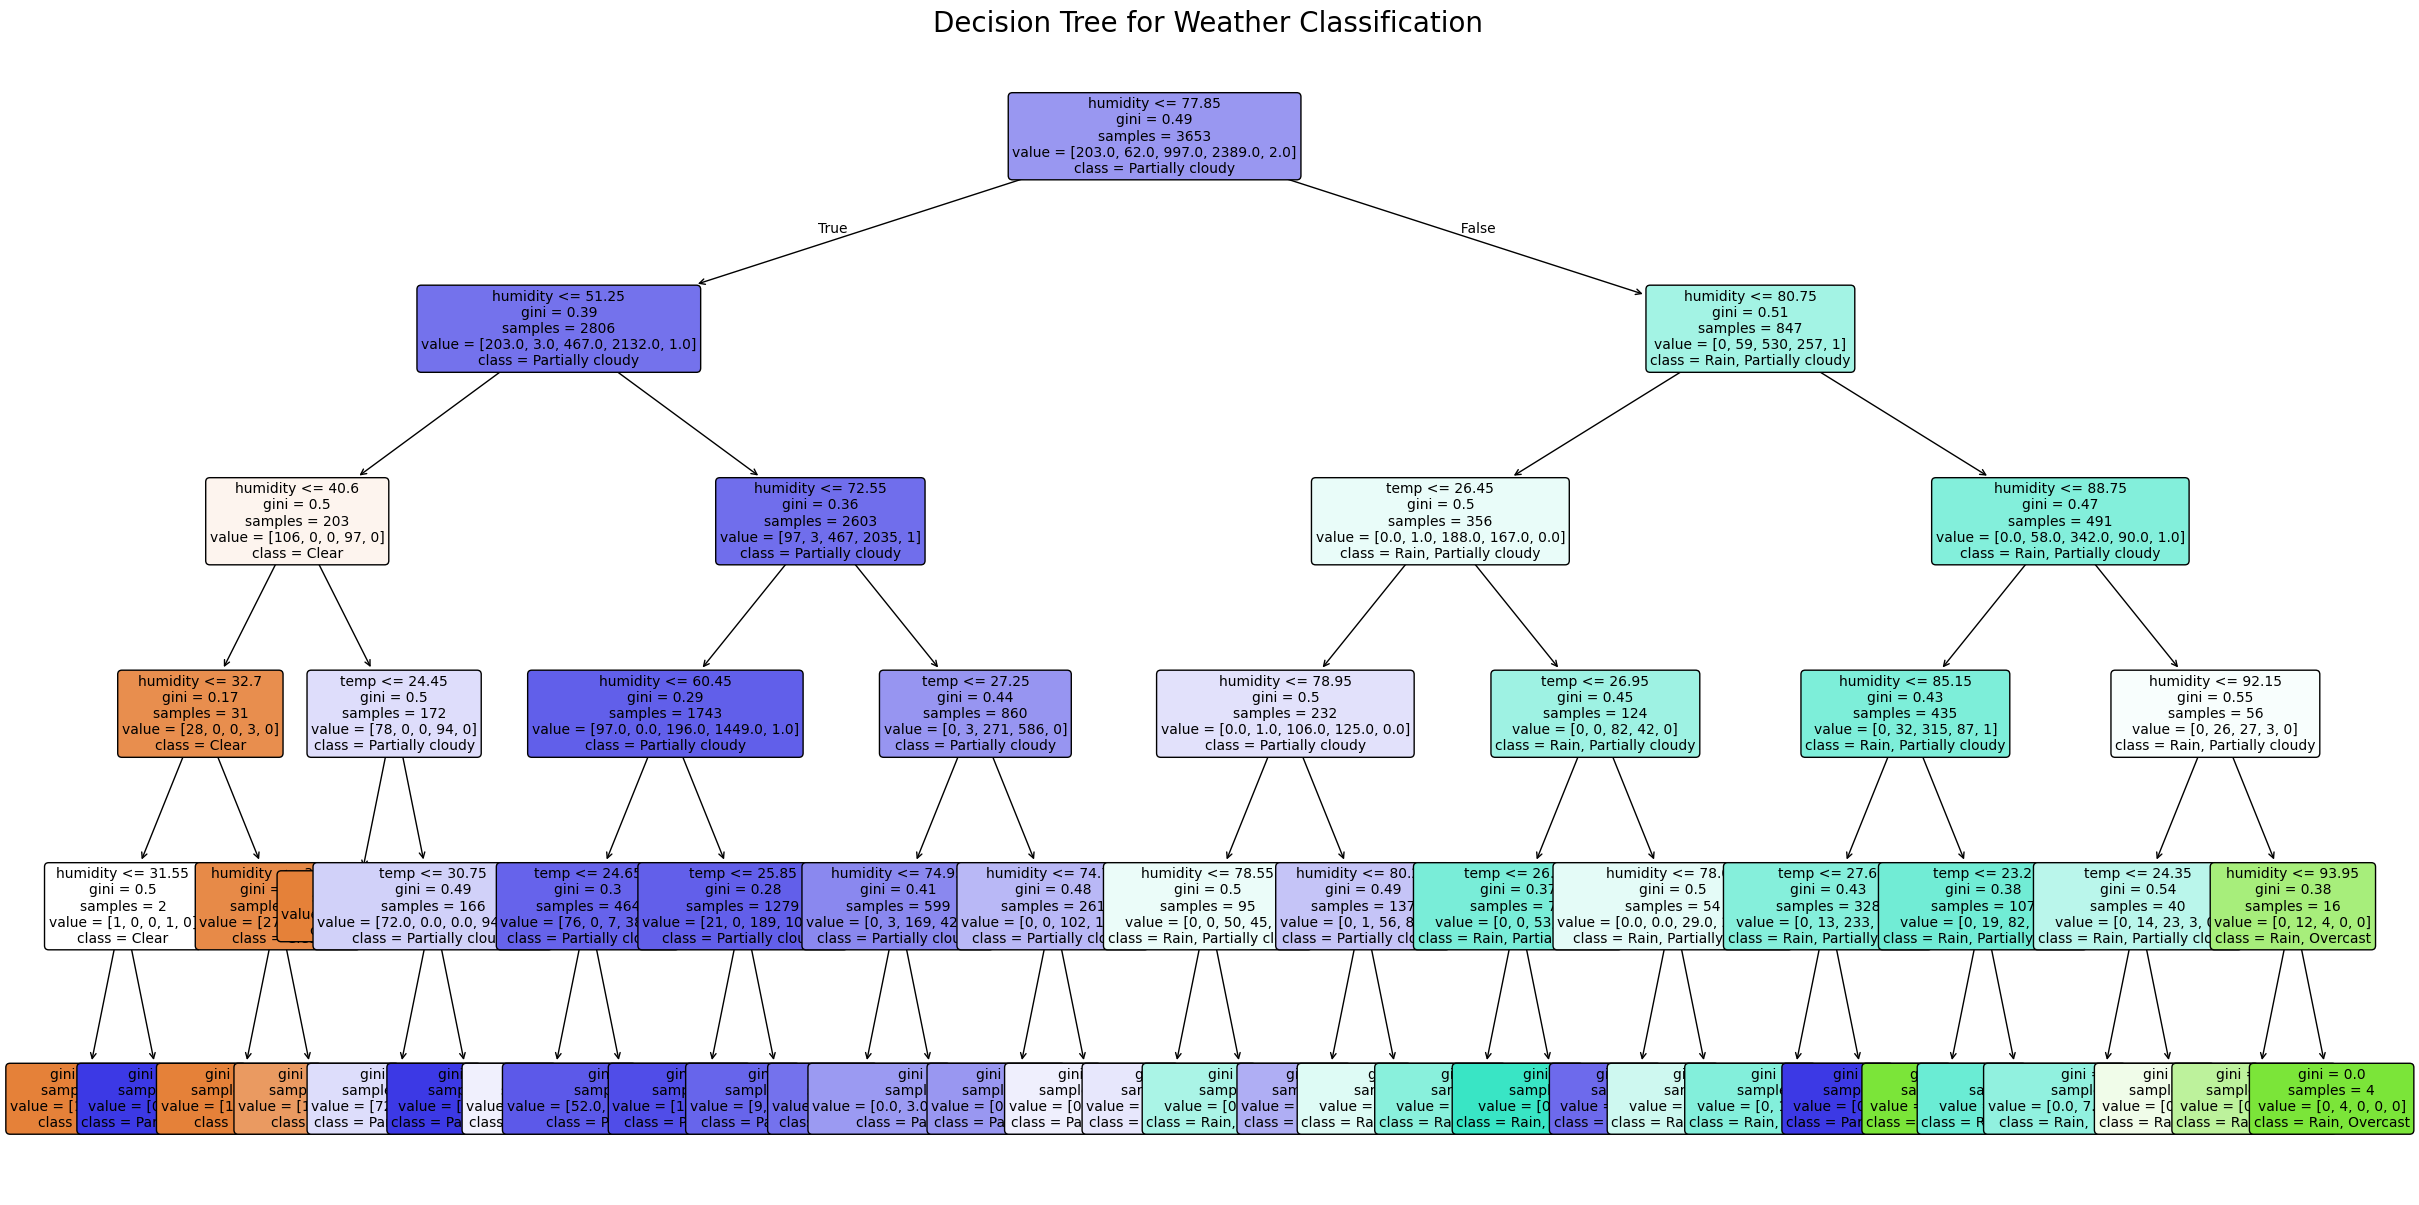

In [5]:

# --- Step 3: Train Decision Tree ---
print("\n--- Training Decision Tree Classifier (max_depth=5) ---")
clf_final = DecisionTreeClassifier(max_depth=5, random_state=42)
clf_final.fit(X, y)
print("Model training complete.")

# --- Step 4: Visualize Decision Tree ---
print("\n--- Generating Decision Tree Visualization... ---")
plt.figure(figsize=(30, 15))
plot_tree(clf_final,
          feature_names=feature_names,
          class_names=class_names,
          filled=True,
          rounded=True,
          fontsize=10,
          precision=2)
plt.title("Decision Tree for Weather Classification", fontsize=20)
plt.savefig("decision_tree_weather.png")
print("Decision tree visualization saved as 'decision_tree_weather.png'")


In [6]:

# --- Step 5: Extract Decision Tree Rules ---
print("\n\n--- Extracted Decision Tree Logic ---")
# Rules with numbers
tree_rules_numbers = export_text(clf_final, feature_names=feature_names)

# Rules with names (replace class numbers with class labels)
tree_rules_names = tree_rules_numbers
for num, name in encoding_map.items():
    tree_rules_names = tree_rules_names.replace(f"class: {name}", f"class: {num}")

# Actually, replace numbers with corresponding names
for name, num in encoding_map.items():
    tree_rules_names = tree_rules_names.replace(f"class: {num}", f"class: {name}")

# --- Step 6: Save both rule files ---
with open("decision_tree_rules_numbers.txt", "w") as f:
    f.write(tree_rules_numbers)

with open("decision_tree_rules_names.txt", "w") as f:
    f.write(tree_rules_names)

print("Decision tree rules saved as 'decision_tree_rules_numbers.txt' and 'decision_tree_rules_names.txt'")



--- Extracted Decision Tree Logic ---
Decision tree rules saved as 'decision_tree_rules_numbers.txt' and 'decision_tree_rules_names.txt'
